# <span style = "color:IndianRed; font-size:40px"> Hurricane </span>

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn import metrics
import glob

### Fetch the training Data

#### Use glob

The data contains 4 subclasses. Store all 4 in different variables

In [24]:
damage=glob.glob('damage/*.jpeg')
no_damage=glob.glob('no_damage/*.jpeg')

### Store all the images inside a list and create a list with the corresponding labels

In [25]:
dic={0:'damage',1:'no_damage'}

In [26]:
damage

['damage\\-93.548123_30.900623.jpeg',
 'damage\\-93.560128_30.894917.jpeg',
 'damage\\-93.578271_30.779923999999998.jpeg',
 'damage\\-93.590598_30.694956.jpeg',
 'damage\\-93.604017_30.793719.jpeg',
 'damage\\-93.6141_30.754263.jpeg',
 'damage\\-93.618483_30.730039.jpeg',
 'damage\\-93.65613_30.076164000000002.jpeg',
 'damage\\-93.658785_30.206929.jpeg',
 'damage\\-93.659161_30.202384999999996.jpeg',
 'damage\\-93.65936500000001_30.138793.jpeg',
 'damage\\-93.659805_30.138094.jpeg',
 'damage\\-93.660431_30.20485.jpeg',
 'damage\\-93.661241_30.212164.jpeg',
 'damage\\-93.66200400000001_30.201602.jpeg',
 'damage\\-93.662444_30.201583000000003.jpeg',
 'damage\\-93.662984_30.209982.jpeg',
 'damage\\-93.6654_30.140094.jpeg',
 'damage\\-93.666735_30.201598999999998.jpeg',
 'damage\\-93.667964_30.143383.jpeg',
 'damage\\-93.669493_30.217792.jpeg',
 'damage\\-93.669804_30.221032.jpeg',
 'damage\\-93.669949_30.223813.jpeg',
 'damage\\-93.67021_30.218049.jpeg',
 'damage\\-93.671616_30.223004.jpe

In [27]:
image=[]
label=[]
for i in damage:
    img=plt.imread(i)
    image.append(img)
    label.append(0)
for i in no_damage:
    img=plt.imread(i)
    image.append(img)
    label.append(1)

In [22]:
image

[]

### print some images

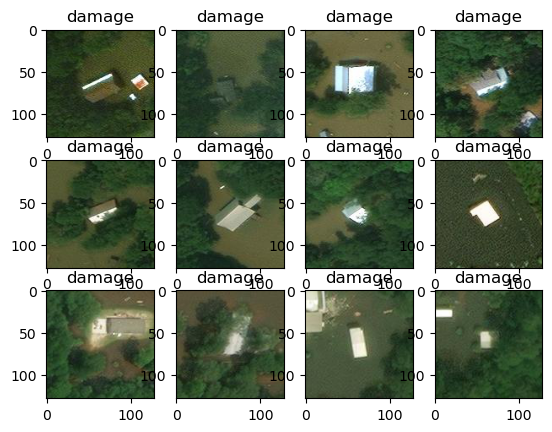

In [28]:
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
    plt.title(dic[label[i]])

### Shuffle both image list and label list

In [30]:
image,label=shuffle(image,label)

### Plot a few images from our shuffled list with its corresponding label 

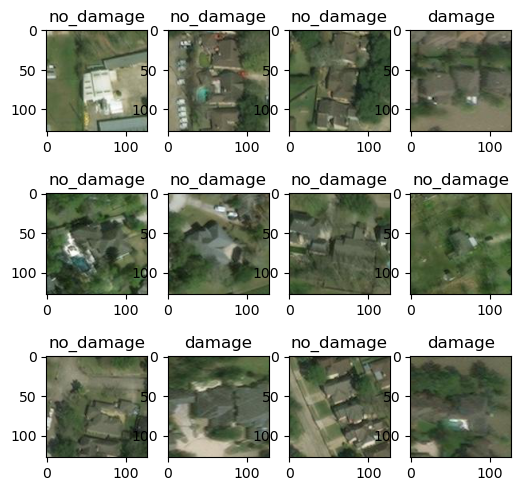

In [32]:
plt.figure(figsize=(6,6))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
    plt.title(dic[label[i]])

### Reshape the images to 224x224

In [33]:
d=[]

for i in image:
    d.append(resize(i,(224,224,3)))

### Plot some of our reshaped images

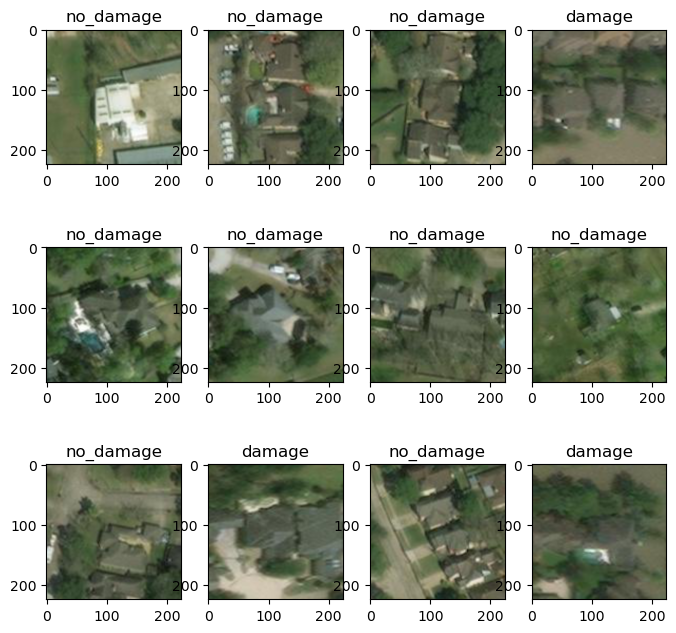

In [35]:
plt.figure(figsize=(8,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(d[i])
    plt.title(dic[label[i]])

### convert to numpy array

In [38]:
X=np.array(d)
y=np.array(label)

### split the data into train and test

In [39]:
from  sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

### Create a keras Sequential model with convolution layers, Flatten and  Hidden layers

In [42]:
model=keras.Sequential([
    keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(224,224,3)),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),             
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
    


### Compile the model

In [43]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### Check the summary of our model

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 93312)             0         
                                                                 
 dense (Dense)               (None, 64)                5

### Train the model. 
Make sure to include a validation data with validation_split

In [45]:
model.fit(X_train,y_train,epochs=10,validation_split=0.05)

Epoch 1/10
48/48 [==============================] - 40s 787ms/step - loss: 0.7153 - accuracy: 0.6224 - val_loss: 0.4742 - val_accuracy: 0.8000
Epoch 2/10
48/48 [==============================] - 37s 763ms/step - loss: 0.4680 - accuracy: 0.8046 - val_loss: 0.4912 - val_accuracy: 0.7500
Epoch 3/10
48/48 [==============================] - 36s 743ms/step - loss: 0.3465 - accuracy: 0.8711 - val_loss: 0.3429 - val_accuracy: 0.8625
Epoch 4/10
48/48 [==============================] - 37s 761ms/step - loss: 0.2542 - accuracy: 0.9013 - val_loss: 0.3862 - val_accuracy: 0.9000
Epoch 5/10
48/48 [==============================] - 36s 747ms/step - loss: 0.2705 - accuracy: 0.8888 - val_loss: 0.3981 - val_accuracy: 0.7875
Epoch 6/10
48/48 [==============================] - 36s 744ms/step - loss: 0.1781 - accuracy: 0.9349 - val_loss: 0.4037 - val_accuracy: 0.8750
Epoch 7/10
48/48 [==============================] - 36s 741ms/step - loss: 0.1243 - accuracy: 0.9638 - val_loss: 0.3525 - val_accuracy: 0.8500

### Evaluate the model

In [46]:
model.evaluate(X_train,y_train)

50/50 [==============================] - 11s 202ms/step - loss: 0.0561 - accuracy: 0.9856


[0.056139253079891205, 0.9856250286102295]

### Make predictions with X_test

In [47]:
y_pred=model.predict(X_test)

13/13 [==============================] - 3s 187ms/step


In [49]:
y_pred=[np.argmax(i) for i in y_pred]

## accuracy score

In [50]:
metrics.accuracy_score(y_test,y_pred)

0.4875

### Visualise confusion matrix on a heatmap

<Axes: >

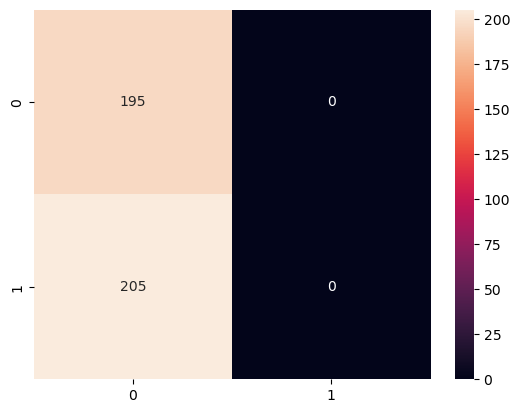

In [51]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,fmt='d')

***

## classification report

In [52]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66       195
           1       0.00      0.00      0.00       205

    accuracy                           0.49       400
   macro avg       0.24      0.50      0.33       400
weighted avg       0.24      0.49      0.32       400



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
